In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

In [ ]:
# Linhas e colunas do nosso CSV

notas.shape

In [ ]:
# Alterar os nomes das colunas 

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

In [ ]:
# Verificar os valores únicos de uma coluna
notas['nota'].unique()

In [ ]:
# Contar a quantidade de vezes que cada valor aparece
notas['nota'].value_counts()

In [ ]:
# Pegando a média das notas

notas['nota'].mean()

In [ ]:
notas["nota"].plot(kind='hist')

In [ ]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f"Mediana é {mediana} e a média é {media}")

In [ ]:
# Descrever as estatísticas do DataFrame

notas['nota'].describe()

In [ ]:
import seaborn as sns

sns.boxplot(notas['nota'])

## Entendendo mais sobre os filmes presentes no movies.csv


In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

In [ ]:
notas.head()

In [ ]:
# Pesquisando apenas respectivo filme com valor == 1 

notas.query("filmeId==1")["nota"].mean()

In [ ]:
medias_filme = notas.groupby("filmeId")['nota'].mean()

medias_filme.head()

In [ ]:
medias_filme.plot(kind='hist')

## Dica - Query com operador @

O método query() permite referenciar variáveis externas dentro da expressão de consulta usando o operador @. Sendo bastante útil para criar consultas dinâmicas com base em variáveis definidas previamente.

### Definindo uma variável externa
```python
produtos = ['Café au lait', 'Espresso', 'Cappuccino']

vendas.query('produto in @produtos and metodo_pagamento == "PIX" ')

```
Neste exemplo, estamos filtrando o DataFrame para selecionar apenas as linhas em que tenham os produtos passados pela lista produtos e que o método de pagamento seja em PIX.

In [ ]:
# Vamos distribuir os valores de forma mais clara com um boxplot

sns.boxplot(medias_filme)

In [ ]:
medias_filme.describe()

In [ ]:
import matplotlib.pyplot as plt

sns.displot(medias_filme,kde = True)
plt.title("Histograma das médias dos filmes")


### Agora iremos explora uma nova base de dados chamada TMDB The Movie DataBase

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

In [ ]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição das receitas dos filmes")
plt.show()

In [ ]:
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.xlabel("Budget")
plt.ylabel("Count")
plt.show()

In [ ]:
tmdb.info()

In [ ]:
tmdb.describe()

In [ ]:
com_fauramento = tmdb.query("revenue > 0")
sns.displot(com_fauramento["revenue"])

In [ ]:
linguagens = tmdb["original_language"].unique()

tmdb["original_language"].value_counts()

index = tmdb["original_language"].value_counts().index
values = tmdb["original_language"].value_counts().values

In [ ]:
contagem_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()

contagem_linguas.columns = ["original_language", "total"]

In [ ]:
sns.barplot(data = contagem_linguas, x = "original_language", y = "total")


In [ ]:
sns.countplot(data = tmdb, x = "original_language")
plt.title("Quantidade de filmes por língua original")
plt.show()

<Axes: ylabel='total'>

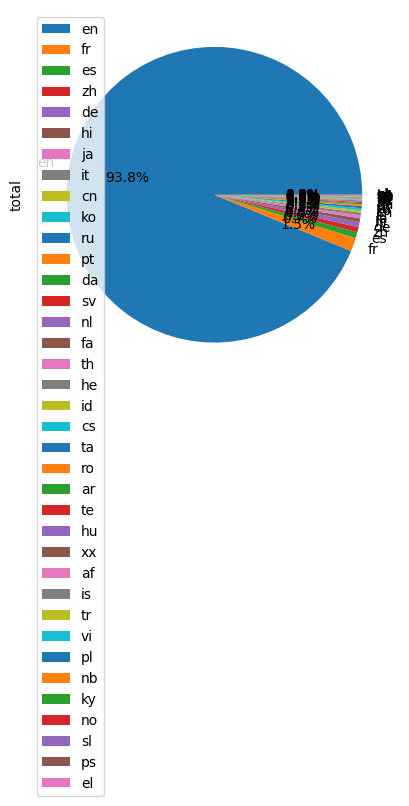

In [106]:
contagem_linguas.plot(kind='pie', x = "original_language", y = "total" , labels = contagem_linguas["original_language"], autopct='%1.1f%%')

In [109]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_de_ingles

total_resto = total_geral - total_de_ingles

print(total_de_ingles, total_resto)

4505 298


In [112]:
Dados = {
"lingua" : ["ingles", "outros"], 
"total" : [total_de_ingles, total_resto]
}
dados = pd.DataFrame(Dados)

dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

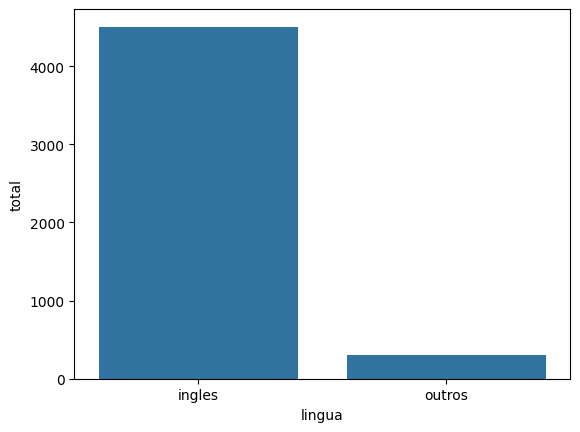

In [113]:
sns.barplot(data = dados, x = "lingua", y = "total")

## Análise de filmes de outros idiomas s

In [115]:
tmdb.query("original_language != 'en'")
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

C:\Users\14280194645\AppData\Local\Temp\ipykernel_14344\2734959988.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = tmdb.query("original_language != 'en'"),


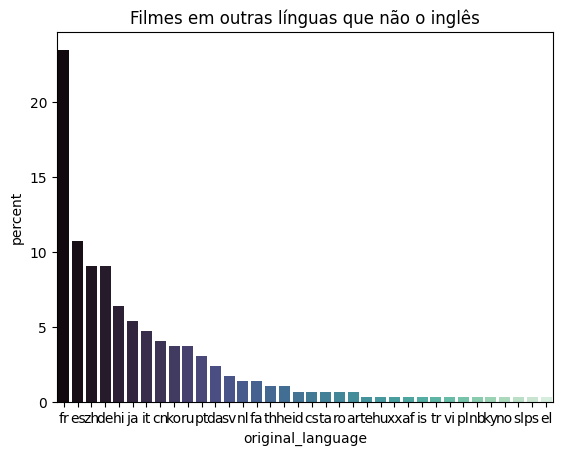

In [122]:
plt.figure(figsize=(16,8))
sns.countplot(data = tmdb.query("original_language != 'en'"),
               x = "original_language", 
               order = total_de_outros_filmes_por_lingua.index,
               stat="percent",
               palette = "mako")
plt.title("Filmes em outras línguas que não o inglês")
plt.show()

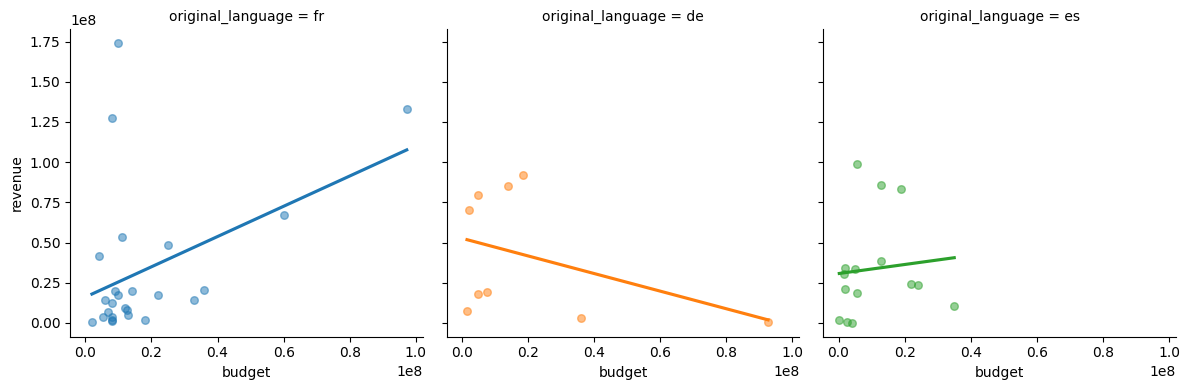

In [118]:
import pandas as pd
import seaborn as sns

# Importando a base de dados
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language", 
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})